In [1]:
import pandas as pd
fbref = pd.read_csv('fbref_outfield_player_stats_Big-5-European-Leagues_2020-2021_last_updated_01092021.csv')
df1 = fbref[fbref['Pos'].apply(lambda x:x in ['FW','MF,FW','FW,MF'])]
all_player = df1.sort_values(by=['Min'],ascending = False,na_position='first')
# Display all rows where Min >= 1500 #500 players
minute = '1500'
age='23'
fw_filter1 = all_player[all_player['Age'].astype('int64')<=int(age)] #กรองแค่ Age Position
#Display all rows where Age <=26
fw_filter2 = fw_filter1[fw_filter1['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position

#จำนวนข้อมูลที่ซ้ำ
print(len(fw_filter2[fw_filter2.duplicated(['Player'], keep = False)])) 
# Remove the duplicates
fw_filter2.drop_duplicates(['Player'], inplace=True)
# Reset dataframe index after drop_duplicates.
fw_filter2.reset_index(drop=True, inplace=True)
#print(fw_filter2)

fw_filter3 = fw_filter2.dropna()
#ข้อมูลซ้ำ
fw_filter3.duplicated('Player', keep = False) 
#จำนวนข้อมูลที่ซ้ำ
print(len(fw_filter3[fw_filter3.duplicated(['Player'], keep = False)])) 
# Remove the duplicates
fw_filter3.drop_duplicates(['Player'], inplace=True)
# Reset dataframe index after drop_duplicates.
fw_filter3.reset_index(drop=True, inplace=True)
#print(fw_filter3)



'''
by_Comp = fw_filter3.groupby('Comp')['Player'].count()
print(by_Comp)
'''
#แยกเป็นตัวแปรง่ายกว่า
FR = fw_filter2.loc[fw_filter2["Comp"] == "fr Ligue 1"]
FR.drop(columns=["Compl","Mn/Start","SoT%","Sh/90","SoT/90",'G/Sh',"G/SoT","Dist","npxG/Sh","Tkl%","Won%"],inplace=True)
FR.dropna(inplace=True)
FR.drop_duplicates(inplace=True)
fr = FR[FR['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position
#print(fr.to_string())
print(len(fr[fr.duplicated(['Player'], keep = False)])) 
#FR.dropna(inplace=True)


bundes = fw_filter3.loc[fw_filter3["Comp"] == "de Bundesliga"]
laliga = fw_filter3.loc[fw_filter3["Comp"] == "es La Liga"]
PL = fw_filter2.loc[fw_filter2["Comp"] == "eng Premier League"]
PL.drop(columns=["Compl","Mn/Start","SoT%","Sh/90","SoT/90",'G/Sh',"G/SoT","Dist","npxG/Sh","Tkl%","Won%"],inplace=True)
PL.dropna(inplace=True)
PL.drop_duplicates(inplace=True)
pl = PL[PL['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position
pl.reset_index(inplace=True)
##print(pl.to_string())
#drop ค่า outlier
#index = [ 29  ,36 , 80 ,100 ,105 ,142, 176 ,178 ,186 ,402 ,433]
#pl.drop(index=index,inplace=True)
#print(pl)

calcio = fw_filter3.loc[fw_filter3["Comp"] == "it Serie A"]
'''
print("------------------Bundesliga GER-----------------")
print(bundes.head(2))
print("--------------------Laliga ESP------------------")
print(laliga.head(2))
print("----------------------EPL-----------------------")
print(pl.head(2))
print("-----------------Calcio Serie A------------------")
print(calcio.head(2))

'''


0


C:\Users\User\AppData\Local\Temp\ipykernel_4152\4247808441.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_filter2.drop_duplicates(['Player'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4152\4247808441.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_filter3.drop_duplicates(['Player'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4152\4247808441.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

0
0


C:\Users\User\AppData\Local\Temp\ipykernel_4152\4247808441.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL.drop_duplicates(inplace=True)


'\nprint("------------------Bundesliga GER-----------------")\nprint(bundes.head(2))\nprint("--------------------Laliga ESP------------------")\nprint(laliga.head(2))\nprint("----------------------EPL-----------------------")\nprint(pl.head(2))\nprint("-----------------Calcio Serie A------------------")\nprint(calcio.head(2))\n\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


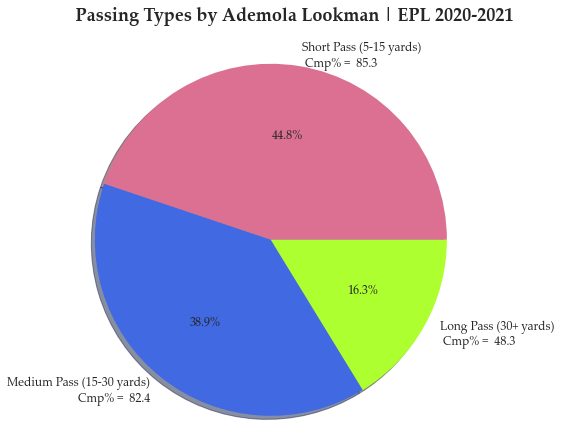

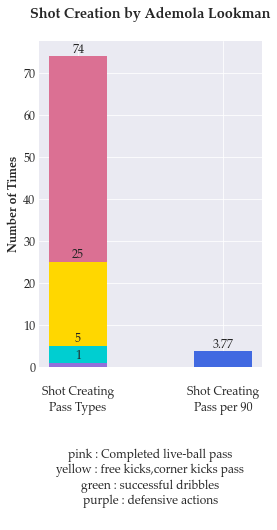

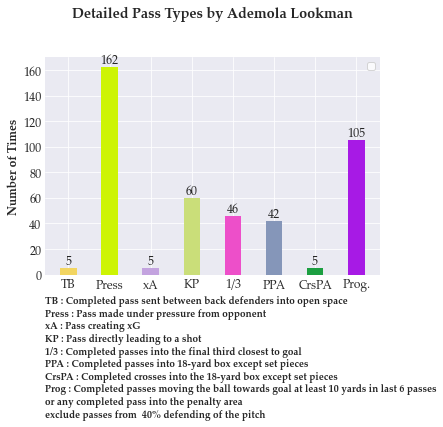

In [4]:
import matplotlib.pyplot as plt
#from adjustText import adjust_text
pl_pass = pl[["Player", "Att.1",'Cmp%.1',"Att.2",'Cmp%.2',"Att.3",'Cmp%.3']]
pl_pass.reset_index(inplace=True,drop=True)

from tkinter import *
from tkinter.ttk import *
import pandas as pd
s = set(pl["Player"])
s = list(s)
window = Tk()
window.geometry("300x300")
txt = Label(window, text="show index ")
txt.grid(column=1, row=0)
##entry = Entry(window)
##entry.grid(column=1,row=3)
def selectPlayer(player):
    x = pl[pl["Player"] == player]
    for i in x.index:
        return int(i) 
def onclick():
    op = combo.get()
    txt.configure(text=selectPlayer(op))

    
    att1 = pl_pass["Att.1"][selectPlayer(op)]
    att2 = pl_pass["Att.2"][selectPlayer(op)]
    att3 = pl_pass["Att.3"][selectPlayer(op)]
        
    x=[int(att1),int(att2),int(att3)]

    cmp1 = pl_pass["Cmp%.1"][selectPlayer(op)]
        
    cmp2 = pl_pass["Cmp%.2"][selectPlayer(op)]
        

    cmp3 = pl_pass['Cmp%.3'][selectPlayer(op)]
    
    #สร้าง passtype , goal and Shot creation dataframe ประกอบด้วย TB Press SCA90 xA  1/3  PPA CrsPA   Prog
    pl_pass_types = pl[["TB","Press","xA","KP","1/3","PPA","CrsPA","Prog"]]
    pl_pass_types.reset_index(inplace=True,drop=True)
    pl_sca_types = pl[["PassLive","PassDead","Drib","Def","SCA90",]]
    pl_sca_types.reset_index(inplace=True,drop=True)
    #staked bar
    live = pl_sca_types["PassLive"][selectPlayer(op)]
    dead = pl_sca_types["PassDead"][selectPlayer(op)]
    drib = pl_sca_types["Drib"][selectPlayer(op)]
    defense = pl_sca_types["Def"][selectPlayer(op)]
    sca90 = pl_sca_types["SCA90"][selectPlayer(op)]
        

    tb = pl_pass_types["TB"][selectPlayer(op)]
    press = pl_pass_types["Press"][selectPlayer(op)]
        
    xa = pl_pass_types["xA"][selectPlayer(op)]
    kp = pl_pass_types["KP"][selectPlayer(op)]
    finalthird = pl_pass_types["1/3"][selectPlayer(op)]
    ppa = pl_pass_types["PPA"][selectPlayer(op)]
    crspa = pl_pass_types["CrsPA"][selectPlayer(op)]
    prog = pl_pass_types["Prog"][selectPlayer(op)]

    #normal pass type
    with plt.style.context("seaborn-dark"):
        player_name = pl_pass["Player"][selectPlayer(op)]
        plt.rcParams['font.family'] = 'Palatino Linotype'
        plt.rcParams['font.size'] = 12
        
        ls_label = ['\nShort Pass (5-15 yards)\n Cmp% =  {}'.format(float(cmp1)),'Medium Pass (15-30 yards)\n Cmp% =  {}'.format(float(cmp2)),'Long Pass (30+ yards)\n Cmp% =  {}'.format(float(cmp3))]
        ls_color = ["palevioletred","royalblue","greenyellow"]
        plt.subplots(figsize=(7,7))
        plt.pie(x,labels=ls_label,explode=(0,0,0),shadow=True,colors=ls_color,autopct='%1.1f%%')
        plt.axis('equal')
        plt.title('           Passing Types by {} | EPL 2020-2021\n'.format(player_name),fontsize=18,fontweight='bold')
    
    #shot creating pass type
    with plt.style.context("seaborn-dark"):
        player_name = pl_pass["Player"][selectPlayer(op)]
        plt.rcParams['font.family'] = 'Palatino Linotype'
        plt.rcParams['font.size'] = 12
        plt.subplots(figsize=(4,6))
        k=plt.bar("\nShot Creating\nPass Types",float(live),label='Completed live-ball pass ',color ="palevioletred",width=0.4) #pink
        l=plt.bar("\nShot Creating\nPass Types",float(dead),bottom=None,label='free kicks,corner kicks pass',color='gold',width=0.4) #yellow
        m=plt.bar("\nShot Creating\nPass Types",float(drib),bottom=None,label='successful dribbles',color='darkturquoise',width=0.4) #green
        n=plt.bar("\nShot Creating\nPass Types",float(defense),bottom=None,label='defensive actions',color='mediumpurple',width=0.4) #purple
        y=plt.bar("\nShot Creating\nPass per 90",float(sca90),color='royalblue',width=0.4) 
        plt.bar_label(y,fmt='%.2f')
        plt.bar_label(k,fmt='%.0f')
        plt.bar_label(l,fmt='%.0f')
        plt.bar_label(m,fmt='%.0f')
        plt.bar_label(n,fmt='%.0f')
        plt.xlabel('\n\npink : Completed live-ball pass\nyellow : free kicks,corner kicks pass\ngreen : successful dribbles\npurple : defensive actions\n')
        plt.title('Shot Creation by {}\n'.format(player_name),fontweight='bold')
        plt.ylabel('Number of Times',fontweight='bold')
        plt.grid()

    #detailed pass type
    import random
    ls_pass = [float(tb),float(press),float(xa),float(kp),float(finalthird),float(ppa),float(crspa),float(prog)]
    ls_types = ["TB","Press","xA","KP","1/3","PPA","CrsPA","Prog."]

    with plt.style.context("seaborn-dark"):
        player_name = pl_pass["Player"][selectPlayer(op)]
        plt.rcParams['font.family'] = 'Palatino Linotype'
        plt.rcParams['font.size'] = 12
        plt.subplots()
        ls_color=[]
        for i in range(len(ls_types)):
            hexadecimal = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
            ls_color.append(hexadecimal)
        x=plt.bar(ls_types,ls_pass,color=ls_color,width=0.4)
        plt.bar_label(x,fmt='%.0f')
        plt.title('Detailed Pass Types by {}\n\n'.format(player_name),fontweight='bold')
        plt.xlabel("TB : Completed pass sent between back defenders into open space\nPress : Pass made under pressure from opponent \nxA : Pass creating xG\nKP : Pass directly leading to a shot\n1/3 : Completed passes into the final third closest to goal\nPPA : Completed passes into 18-yard box except set pieces\nCrsPA : Completed crosses into the 18-yard box except set pieces\nProg : Completed passes moving the ball towards goal at least 10 yards in last 6 passes\nor any completed pass into the penalty area \nexclude passes from  40% defending of the pitch",fontsize=10,fontweight='bold',loc='left')
        
        plt.ylabel('Number of Times',fontweight='bold')
        plt.grid()
    plt.legend()
butt = Button(window, text="click", command=onclick)
butt.grid(column=2,row=1)
combo = Combobox(window)
combo["values"] = s
combo.grid(column=1,row=1)
window.mainloop()
plt.show()
